# Graph Neural Networks with PyTorch Geometric (PyG)

Here, we will focus specifically on **homogeneous graphs**.


## Preamble on Virtual Environments

It is recommended to have separate virtualenvironments for separate projects. We use virtualenvironments to efficiently localize our library installations. In a similar fashion, we already have a virtual environment ready for our PyG exploration named `pyg_explore`

## Table of Contents

1. Introduction to Graph Data Structure in PyG
2. Homogeneous Data Example
3. Loading a Default Dataset
4. Creating Custom Graph Data
5. Splitting the Data
6. Working with Mini-Batches

## 1. Introduction to Graph Data Structure in PyG

Graphs are an efficient and flexible data structure that can represent complex relationships between entities. In PyG, the core structure for graph data is encapsulated by the `torch_geometric.data.Data` class. This class is used to represent **homogeneous graphs**, where all nodes and edges are of the same type.

### Key Components of a Homogeneous Graph:
- **Nodes**: Represent the entities in the graph
- **Edges**: Represent relationships or connections between the nodes
- **Node Features**: Feature vectors that describe each node
- **Edge Features**: Feature vectors that describe each edge (optional)
- **Graph-level Information**: Metadata or labels at the graph level (optional)

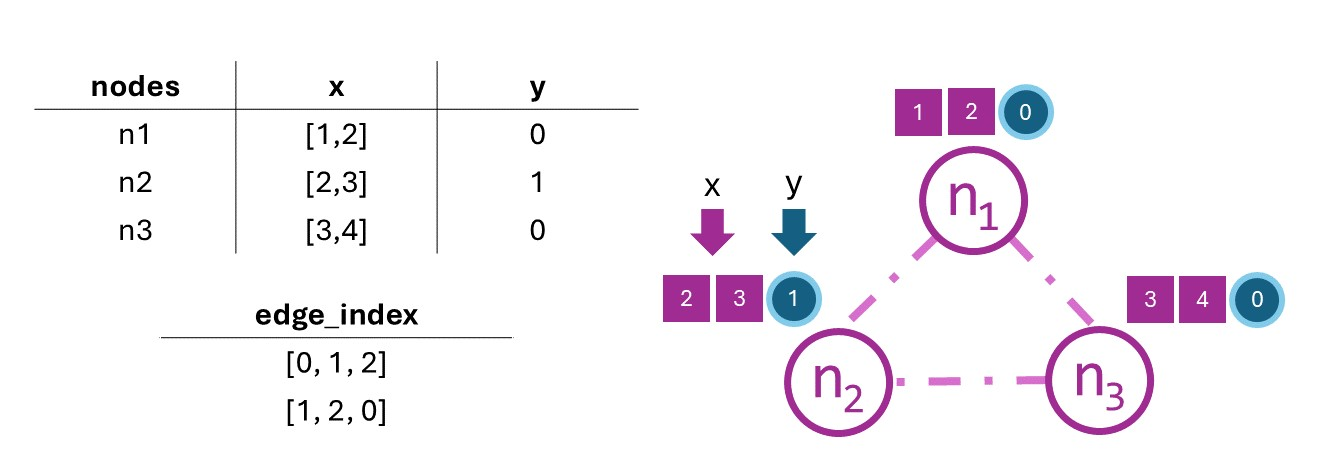

## 2. Homogeneous Data Example

Homogeneous graphs have a uniform node and edge type, which makes them simpler to handle compared to heterogeneous graphs.

The `torch_geometric.data.Data` class and its properties, such as `x` for node features, `edge_index` for the edge connections, and `y` for the graph or node labels are used to represent the entire graph structure.

In [1]:
# Import necessary libraries
import torch
from torch_geometric.data import Data

# Define node features (x), edge indices (edge_index), and labels (y)
# Node feature matrix: 3 nodes with 2 features each
x = torch.tensor([[1, 2], [2, 3], [3, 4]], dtype=torch.float)

# Edge index: 2 edges connecting nodes (from_node -> to_node)
edge_index = torch.tensor([[0, 1, 2], [1, 2, 0]], dtype=torch.long)

# Labels for each node
y = torch.tensor([0, 1, 0], dtype=torch.long)

# Create the Data object (graph structure)
data = Data(x=x, edge_index=edge_index, y=y)

# Print out the graph's basic information
print("Graph Information:")
print(f"Node feature matrix (x):\n{data.x}")
print(f"Edge indices (edge_index):\n{data.edge_index}")
print(f"Labels (y):\n{data.y}")

# Check additional attributes
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Graph has isolated nodes: {data.has_isolated_nodes()}")
print(f"Graph has self-loops: {data.has_self_loops()}")

Graph Information:
Node feature matrix (x):
tensor([[1., 2.],
        [2., 3.],
        [3., 4.]])
Edge indices (edge_index):
tensor([[0, 1, 2],
        [1, 2, 0]])
Labels (y):
tensor([0, 1, 0])
Number of nodes: 3
Number of edges: 3
Graph has isolated nodes: False
Graph has self-loops: False


## 3. Loading a Default Dataset

PyG comes with several built-in datasets that can be used for experimentation and practice.

Let's see how to :
- Use the `torch_geometric.datasets` module
- Download and load a dataset
- Access important data properties like `num_features`, `num_classes`, etc.

In [2]:
# Import necessary libraries
from torch_geometric.datasets import Planetoid

# Load the Cora dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')

# Print basic dataset information
print("=== Cora Dataset ===")
print(f"Number of graphs: {len(dataset)}")
print(f"Number of classes: {dataset.num_classes}")
print(f"Number of node features: {dataset.num_node_features}")
print(f"Dataset structure:\n{dataset}")

# Access the first graph in the dataset
data = dataset[0]

# Print information about the graph
print("\n=== Graph Data ===")
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Node feature matrix (first 5 nodes):\n{data.x[:5]}")
print(f"Edge index (first 5 edges):\n{data.edge_index[:, :5]}")
print(f"Node labels (first 5 nodes): {data.y[:5]}")


Processing...


=== Cora Dataset ===
Number of graphs: 1
Number of classes: 7
Number of node features: 1433
Dataset structure:
Cora()

=== Graph Data ===
Number of nodes: 2708
Number of edges: 10556
Node feature matrix (first 5 nodes):
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Edge index (first 5 edges):
tensor([[ 633, 1862, 2582,    2,  652],
        [   0,    0,    0,    1,    1]])
Node labels (first 5 nodes): tensor([3, 4, 4, 0, 3])


Done!


## 4. Creating Custom Graph Data

While default datasets are useful for learning, creating our own dataset is often necessary for real-world applications. We need to use the  `torch_geometric.data.Data` class to create a homogeneous dataset.

Let's look into:
- Initializing node features and edges
- Adding labels to nodes or edges
- Ensuring the data is properly formatted for PyG to work with

In [3]:
# Import necessary libraries
import torch
from torch_geometric.data import Data

# Define custom node features (x) for 4 nodes, each with 3 features
x = torch.tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9],
                  [10, 11, 12]], dtype=torch.float)

# Define edge index (edge_index) connecting nodes (from_node -> to_node)
edge_index = torch.tensor([[0, 1, 2, 3],  # Source nodes
                           [1, 2, 3, 0]],  # Target nodes
                          dtype=torch.long)

# Define node labels (y) for node classification
y = torch.tensor([0, 1, 0, 1], dtype=torch.long)

# Optional: Define edge attributes/features (edge_attr)
edge_attr = torch.tensor([[1.0], [2.0], [3.0], [4.0]], dtype=torch.float)

# Create a custom graph using PyG's Data class
data = Data(x=x, edge_index=edge_index, y=y, edge_attr=edge_attr)

# Print out the graph data
print("=== Custom Graph Data ===")
print(f"Node feature matrix (x):\n{data.x}")
print(f"Edge indices (edge_index):\n{data.edge_index}")
print(f"Node labels (y):\n{data.y}")
print(f"Edge attributes (edge_attr):\n{data.edge_attr}")
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Number of node features: {data.num_node_features}")

# Check if the data integrity is intact
data.validate(raise_on_error = True)


=== Custom Graph Data ===
Node feature matrix (x):
tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])
Edge indices (edge_index):
tensor([[0, 1, 2, 3],
        [1, 2, 3, 0]])
Node labels (y):
tensor([0, 1, 0, 1])
Edge attributes (edge_attr):
tensor([[1.],
        [2.],
        [3.],
        [4.]])
Number of nodes: 4
Number of edges: 4
Number of node features: 3


True

## 5. Splitting the Data

- Splitting node-level data using `train_mask`, `val_mask`, and `test_mask`
- How to create masks for graph-level tasks

In [4]:
# Import necessary libraries
from torch_geometric.datasets import Planetoid

# Load the Cora dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]

# Print the original data properties
print("=== Original Graph Data ===")
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Node labels (y):\n{data.y}")

# Display the available masks
print("\n=== Available Masks ===")
print(f"Training mask: {data.train_mask.sum().item()} nodes")
print(f"Validation mask: {data.val_mask.sum().item()} nodes")
print(f"Test mask: {data.test_mask.sum().item()} nodes")

# Modifying masks (optional)
# Example: Create a custom training mask with a different split
num_nodes = data.num_nodes
train_size = int(num_nodes * 0.6)  # 60% for training
val_size = int(num_nodes * 0.2)  # 20% for validation
test_size = num_nodes - train_size - val_size  # Remaining for testing

# Randomly permute the node indices
indices = torch.randperm(num_nodes)

# Create new masks
data.train_mask = torch.zeros(num_nodes, dtype=torch.bool)
data.val_mask = torch.zeros(num_nodes, dtype=torch.bool)
data.test_mask = torch.zeros(num_nodes, dtype=torch.bool)

data.train_mask[indices[:train_size]] = True
data.val_mask[indices[train_size:train_size + val_size]] = True
data.test_mask[indices[train_size + val_size:]] = True

# Display the modified masks
print("\n=== Modified Masks ===")
print(f"Custom Training mask: {data.train_mask.sum().item()} nodes")
print(f"Custom Validation mask: {data.val_mask.sum().item()} nodes")
print(f"Custom Test mask: {data.test_mask.sum().item()} nodes")


=== Original Graph Data ===
Number of nodes: 2708
Number of edges: 10556
Node labels (y):
tensor([3, 4, 4,  ..., 3, 3, 3])

=== Available Masks ===
Training mask: 140 nodes
Validation mask: 500 nodes
Test mask: 1000 nodes

=== Modified Masks ===
Custom Training mask: 1624 nodes
Custom Validation mask: 541 nodes
Custom Test mask: 543 nodes


### Using RandomNodeSplit

Refer to https://pytorch-geometric.readthedocs.io/en/latest/generated/torch_geometric.transforms.RandomNodeSplit.html

In [10]:
from torch_geometric.transforms import RandomNodeSplit

# Apply RandomNodeSplit transform to split the data into train, validation, and test sets
transform = RandomNodeSplit(num_train_per_class=20, num_val=500)
data = transform(dataset[0])

# Print the number of nodes in each split
print("=== Node Split Counts ===")
print(f"Training nodes: {data.train_mask.sum().item()}")
print(f"Validation nodes: {data.val_mask.sum().item()}")
print(f"Test nodes: {data.test_mask.sum().item()}")

# Check the node labels for each split
print("\n=== Node Labels Sample ===")
print("Training Labels (first 5):", data.y[data.train_mask][:5])
print("Validation Labels (first 5):", data.y[data.val_mask][:5])
print("Test Labels (first 5):", data.y[data.test_mask][:5])


=== Node Split Counts ===
Training nodes: 1208
Validation nodes: 500
Test nodes: 1000

=== Node Labels Sample ===
Training Labels (first 5): tensor([3, 4, 2, 3, 4])
Validation Labels (first 5): tensor([4, 3, 3, 3, 3])
Test Labels (first 5): tensor([0, 3, 0, 3, 2])


## 6. Working with Mini-Batches

When working with graph data, it's not always feasible to process the entire dataset in one go, especially for large graphs. PyG allows for efficient handling of graph data using **mini-batches**

We look into : 
- The concept of batching graph data
- Using `torch_geometric.loader.DataLoader` to create mini-batches
- The difference between batching homogeneous graphs versus traditional data batching in PyTorch

Refer to https://pytorch-geometric.readthedocs.io/en/2.5.2/modules/loader.html#torch_geometric.loader.DataLoader

In [11]:
# Import necessary libraries
from torch_geometric.loader import DataLoader

# Load the Cora dataset
dataset = Planetoid(root='/tmp/Cora', name='Cora')

# Create a DataLoader for mini-batching
# Here, we specify a batch size of 64
loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Iterate through mini-batches
print("=== Mini-Batch Processing ===")
for batch in loader:
    # Each batch is a mini-batch of graphs
    print(f"Batch size: {batch.num_graphs}")
    print(f"Number of nodes in this batch: {batch.num_nodes}")
    print(f"Number of edges in this batch: {batch.num_edges}")

    # You can access features and labels as follows
    print(f"Node features shape: {batch.x.shape}")
    print(f"Edge index shape: {batch.edge_index.shape}")
    print(f"Node labels shape: {batch.y.shape}\n")

    # Typically, you would pass the batch to your model for training/evaluation here
    # model(batch.x, batch.edge_index, batch.batch)
    break  # Just to demonstrate one batch for now


=== Mini-Batch Processing ===
Batch size: 1
Number of nodes in this batch: 2708
Number of edges in this batch: 10556
Node features shape: torch.Size([2708, 1433])
Edge index shape: torch.Size([2, 10556])
Node labels shape: torch.Size([2708])

